## Evaluate regression models using performance metrics such as MSE, RMSE, and R², and apply k-fold cross-validation to assess the generalisation ability of the models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
X, y = make_regression(
    n_samples=200,
    n_features=1,
    noise=20,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Performance Metrics:
Mean Squared Error (MSE): 437.550
Root Mean Squared Error (RMSE): 20.918
R² Score: 0.945


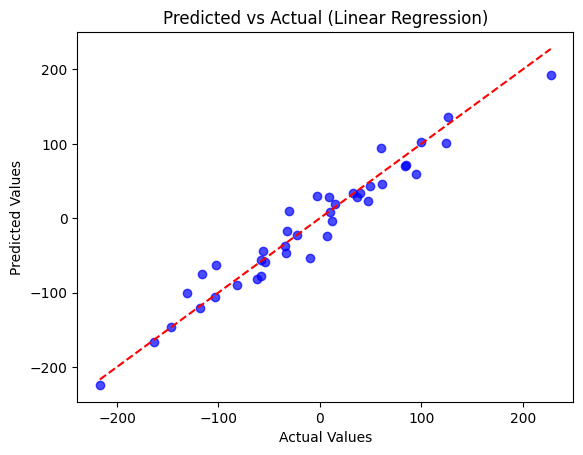

In [7]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
cv_rmse = np.sqrt(cv_mse)
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=kf)

print("\nK-Fold Cross-Validation Results (5 folds):")
print(f"Average MSE: {cv_mse.mean():.3f}")
print(f"Average RMSE: {cv_rmse.mean():.3f}")
print(f"Average R²: {cv_r2.mean():.3f}")


K-Fold Cross-Validation Results (5 folds):
Average MSE: 415.635
Average RMSE: 20.340
Average R²: 0.934
